In [6]:
import numpy as np
import pandas as pd
import pylab as pl

%matplotlib inline

filename_test = 'test.csv'
filename_train = 'train.csv'
filename_store = 'store.csv'

train = pd.read_csv(filename_train, header=0, low_memory=False)

test = pd.read_csv(filename_test, header=0, low_memory=False)


store = pd.read_csv(filename_store, header=0, low_memory=False)



In [7]:
train['Date'] = pd.to_datetime(train['Date'])

test['Date'] = pd.to_datetime(test['Date'])


In [8]:
def print_missing_stats():
    for data_name, data in {'TRAIN': train, 'TEST': test, 'STORE': store}.items():
        print(data_name, ' (overall = %d)' % len(data))
        for attribute in data.columns:
            mask = data[attribute].isnull()
            k = len(data[attribute][mask].tolist())
            print('%5d (%2d%%)' % (k, 100*k/len(data)), 'missing values in ', attribute) 
        print()
print_missing_stats()

TRAIN  (overall = 1017209)
    0 ( 0%) missing values in  Store
    0 ( 0%) missing values in  DayOfWeek
    0 ( 0%) missing values in  Date
    0 ( 0%) missing values in  Sales
    0 ( 0%) missing values in  Customers
    0 ( 0%) missing values in  Open
    0 ( 0%) missing values in  Promo
    0 ( 0%) missing values in  StateHoliday
    0 ( 0%) missing values in  SchoolHoliday

STORE  (overall = 1115)
    0 ( 0%) missing values in  Store
    0 ( 0%) missing values in  StoreType
    0 ( 0%) missing values in  Assortment
    3 ( 0%) missing values in  CompetitionDistance
  354 (31%) missing values in  CompetitionOpenSinceMonth
  354 (31%) missing values in  CompetitionOpenSinceYear
    0 ( 0%) missing values in  Promo2
  544 (48%) missing values in  Promo2SinceWeek
  544 (48%) missing values in  Promo2SinceYear
  544 (48%) missing values in  PromoInterval

TEST  (overall = 41088)
    0 ( 0%) missing values in  Id
    0 ( 0%) missing values in  Store
    0 ( 0%) missing values in  DayOfW

In [9]:
test.loc('Open')[test['Open'].isnull()] = 0

distance_series = store['CompetitionDistance']
since_month = store['CompetitionOpenSinceMonth']
since_year = store['CompetitionOpenSinceYear']
store.loc('CompetitionDistance')[distance_series.isnull()] = distance_series.mean()
store.loc('CompetitionOpenSinceMonth')[since_month.isnull()] = int(since_month.mode())
store.loc('CompetitionOpenSinceYear')[since_year.isnull()] = int(since_year.mode())

print_missing_stats()

TRAIN  (overall = 1017209)
    0 ( 0%) missing values in  Store
    0 ( 0%) missing values in  DayOfWeek
    0 ( 0%) missing values in  Date
    0 ( 0%) missing values in  Sales
    0 ( 0%) missing values in  Customers
    0 ( 0%) missing values in  Open
    0 ( 0%) missing values in  Promo
    0 ( 0%) missing values in  StateHoliday
    0 ( 0%) missing values in  SchoolHoliday

STORE  (overall = 1115)
    0 ( 0%) missing values in  Store
    0 ( 0%) missing values in  StoreType
    0 ( 0%) missing values in  Assortment
    0 ( 0%) missing values in  CompetitionDistance
    0 ( 0%) missing values in  CompetitionOpenSinceMonth
    0 ( 0%) missing values in  CompetitionOpenSinceYear
    0 ( 0%) missing values in  Promo2
  396 (35%) missing values in  Promo2SinceWeek
  396 (35%) missing values in  Promo2SinceYear
  396 (35%) missing values in  PromoInterval

TEST  (overall = 41088)
    0 ( 0%) missing values in  Id
    0 ( 0%) missing values in  Store
    0 ( 0%) missing values in  DayOfW

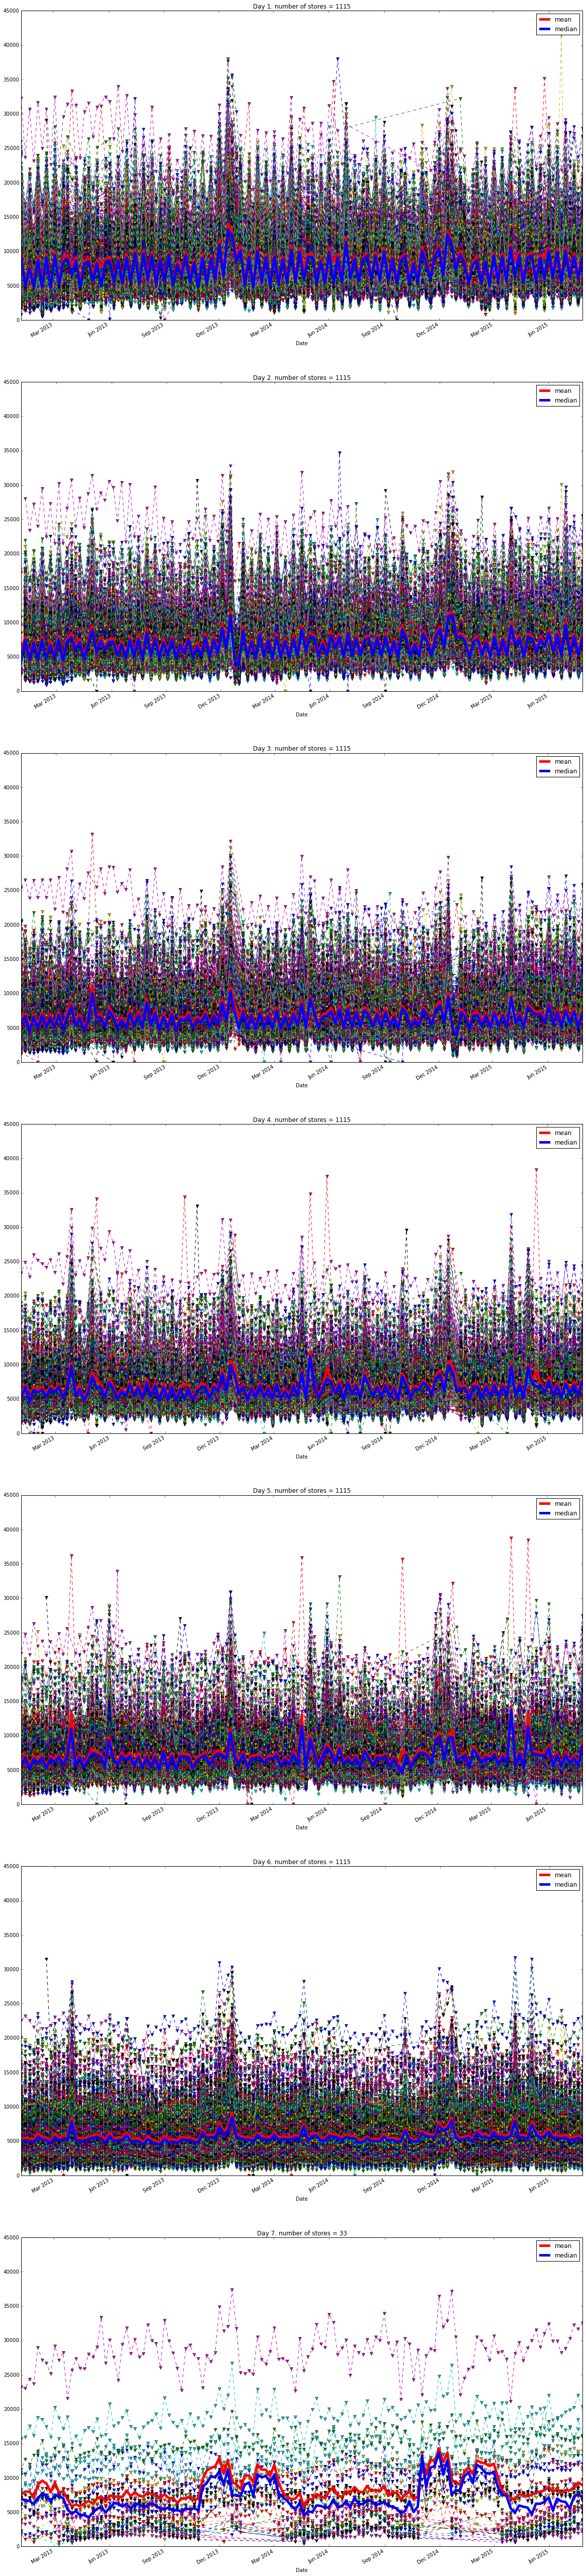

In [40]:
fig, axes = pl.subplots(nrows=7, ncols=1, sharey=True, figsize=(20,100))
for day_of_week in range(1, 8):
    custom_df = train[(train['Open'] == 1) & (train['DayOfWeek'] == day_of_week)]
    gp_store = custom_df.groupby('Store')

    for store, group in gp_store:
        axes[day_of_week - 1].plot(group['Date'], group['Sales'], 'v--')

#     for store, group in gp_store:
#         ts_ewma = pd.ewma(group['Sales'], com=7)
#         axes[day_of_week - 1].plot(group['Date'], ts_ewma, 'v--')

    gp_date = custom_df.groupby('Date')

    ts_mean = gp_date['Sales'].mean()
    ts_median = gp_date['Sales'].median()
    ts_mean.plot(style='r-', linewidth=5, ax=axes[day_of_week - 1], label='mean')
    ts_median.plot(style='b-', linewidth=5, ax=axes[day_of_week - 1], label='median')


    axes[day_of_week - 1].set_title('Day ' + str(day_of_week) + '. number of stores = ' + str(len(gp_store)))
    axes[day_of_week - 1].legend()

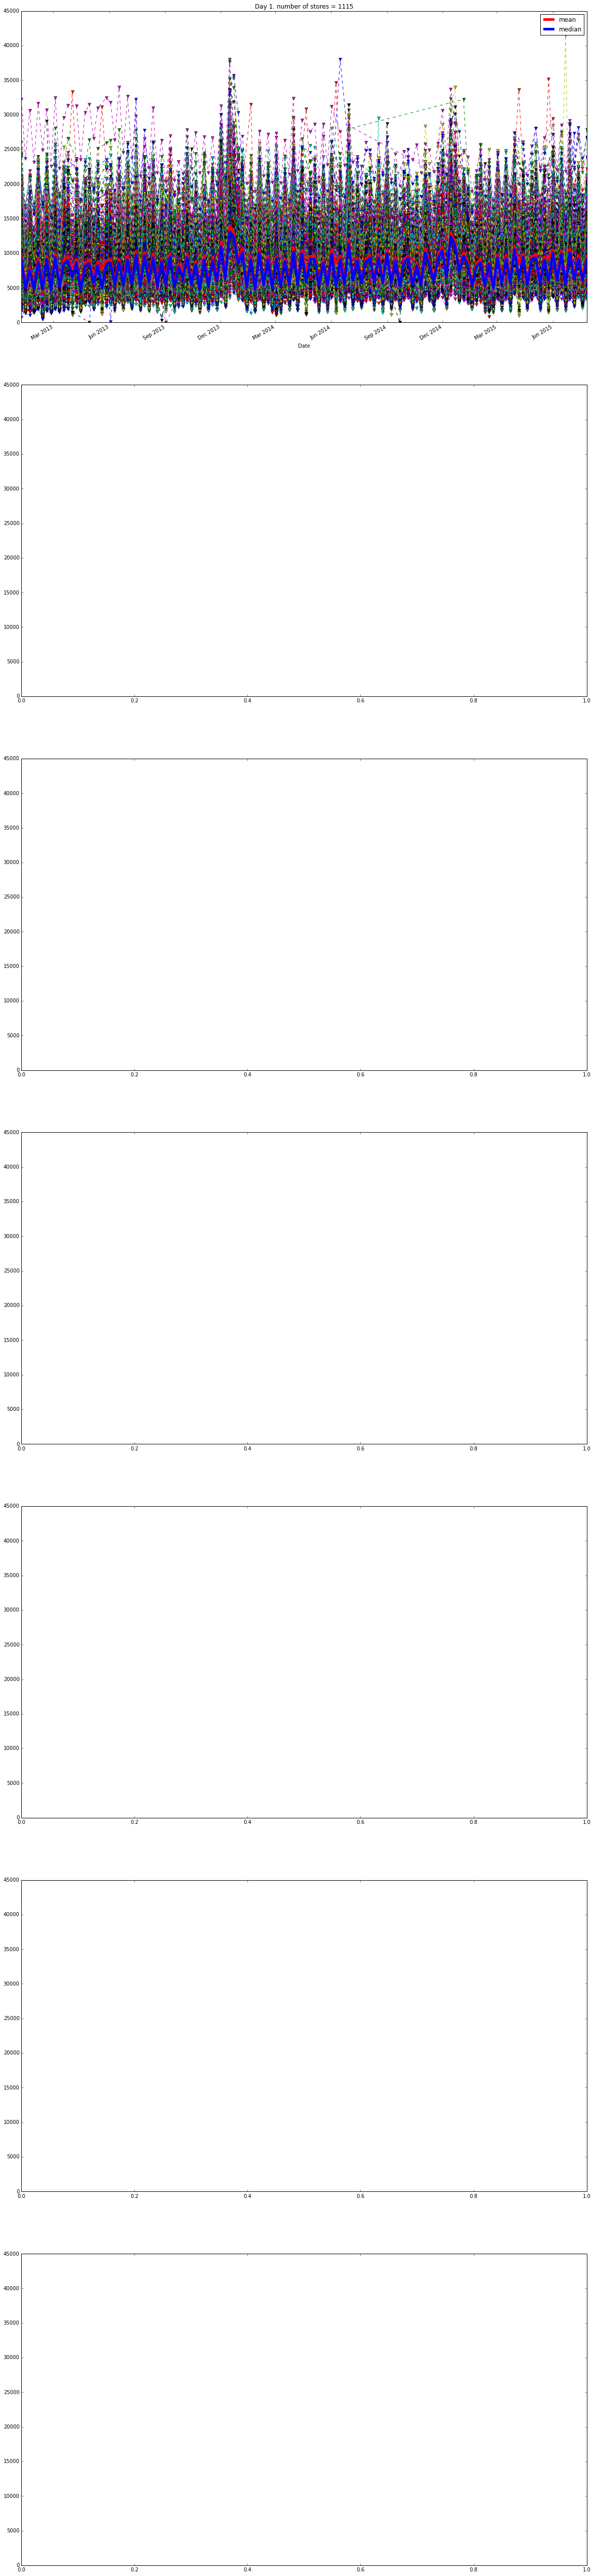

In [38]:
fig, axes = pl.subplots(nrows=7, ncols=1, sharey=True, figsize=(20,100))
for day_of_week in range(1, 8):
    for open_flag in [0, 1]:
        for promo_flag in [0, 1]:
            custom_df = train[(train['Open'] == open_flag) & (train['DayOfWeek'] == day_of_week) & (train['Promo'] == promo_flag)]
            gp_store = custom_df.groupby('Store')

        #     for store, group in gp_store:
        #         axes[day_of_week - 1].plot(group['Date'], group['Sales'], 'v--')

        #     for store, group in gp_store:
        #         ts_ewma = pd.ewma(group['Sales'], com=7)
        #         axes[day_of_week - 1].plot(group['Date'], ts_ewma, 'v--')



            gp_date = custom_df.groupby('Date')

            ts_mean = gp_date['Sales'].mean()
            ts_median = gp_date['Sales'].median()
            ts_mean.plot(style='r-', linewidth=5, ax=axes[day_of_week - 1], label='mean')
            ts_median.plot(style='b-', linewidth=5, ax=axes[day_of_week - 1], label='median')



            axes[day_of_week - 1].set_title('Day ' + str(day_of_week) + '. number of stores = ' + str(len(gp_store)))
            axes[day_of_week - 1].legend()